# Exploratory Data Analysis on Unicorn Dataset

## **Data pre-processing**

In [3]:
# Load the dataset
import pandas as pd
import numpy as np

unicornData = pd.read_csv("Unicorn_Companies.csv")

In [4]:
# Show the dataset entries
print("First rows of Dataset: ", unicornData.head)
print("Description of the Dataset: ", unicornData.describe)
print("Shape of the Dataset: ", unicornData.shape)
print("Columns of the Dataset: ", unicornData.columns)

First rows of Dataset:  <bound method NDFrame.head of            Company Valuation ($B)  ... Deal Terms Portfolio Exits
0        Bytedance           $140  ...          8               5
1           SpaceX         $100.3  ...         12            None
2           Stripe            $95  ...         12               1
3           Klarna          $45.6  ...         13               1
4       Epic Games            $42  ...          5               2
...            ...            ...  ...        ...             ...
1032     Timescale             $1  ...          2            None
1033      Scalapay             $1  ...          2            None
1034  Omada Health             $1  ...          6            None
1035    BlueVoyant             $1  ...          2            None
1036          Veev             $1  ...          1            None

[1037 rows x 13 columns]>
Description of the Dataset:  <bound method NDFrame.describe of            Company Valuation ($B)  ... Deal Terms Portfolio Exit

In [5]:
# Chech for the datatype and existing Null values in the dataset
unicornData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company            1037 non-null   object
 1   Valuation ($B)     1037 non-null   object
 2   Date Joined        1037 non-null   object
 3   Country            1037 non-null   object
 4   City               1037 non-null   object
 5   Industry           1037 non-null   object
 6   Select Inverstors  1037 non-null   object
 7   Founded Year       1037 non-null   object
 8   Total Raised       1037 non-null   object
 9   Financial Stage    1037 non-null   object
 10  Investors Count    1037 non-null   object
 11  Deal Terms         1037 non-null   object
 12  Portfolio Exits    1037 non-null   object
dtypes: object(13)
memory usage: 105.4+ KB


### Here we need to change some datatypes for better dealing with the dataset

In [6]:
# Converting Valuation column to the float and also remove the dollar sign
unicornData['Valuation ($B)'] = unicornData['Valuation ($B)'].str.replace('$', '').astype('float64')
# Converting Date Joined Column to DateTime format and extract year 
unicornData['Date Joined'] = pd.to_datetime(unicornData['Date Joined'])
unicornData['Year_Joined'] = unicornData['Date Joined'].dt.year

### Here is the count of values for columns

In [7]:
# Countries in dataset
unicornData['Country'].value_counts()

United States           536
China                   168
India                    63
United Kingdom           42
France                   24
Germany                  24
Israel                   20
Canada                   19
Brazil                   16
South Korea              12
Singapore                12
Indonesia                 7
Sweden                    6
Netherlands               6
Mexico                    6
Australia                 6
Hong Kong                 6
Japan                     6
Ireland                   5
Switzerland               5
Norway                    4
Belgium                   3
Spain                     3
Finland                   3
Turkey                    3
United Arab Emirates      3
South Africa              2
Philippines               2
Chile                     2
Thailand                  2
Estonia                   2
Denmark                   2
Vietnam                   2
Austria                   2
Colombia                  2
Czech Republic      

In [8]:
# Cities in the dataset
unicornData['City'].value_counts()

San Francisco     145
New York           96
Beijing            63
Shanghai           43
London             33
                 ... 
Lagos               1
Pennsauken          1
Plantation          1
Portola Valley      1
Milan               1
Name: City, Length: 256, dtype: int64

# Univariate Analysis:

### Group the data to have better understanding for vizualization

In [9]:
grouped1 = unicornData.groupby('Country')['City'].apply(list).reset_index()

# Creating a dictionary from the grouped DataFrame
country_city_dict = dict(zip(grouped1['Country'], grouped1['City']))
print(country_city_dict)

{'Argentina': ['Buenos Aires'], 'Australia': ['Surry Hills', 'Melbourne', 'Sydney', 'Richmond', 'Brisbane', 'Alexandria'], 'Austria': ['Vienna', 'Vienna'], 'Bahamas': ['Fintech'], 'Belgium': ['Brussels', 'Louvain-la-Neuve', 'Ghent'], 'Bermuda': ['Hamilton'], 'Brazil': ['Campinas', 'Sao Paulo', 'Sao Paulo', 'Sao Paulo', 'Sao Paulo', 'Sao Paulo', 'Sao Paulo', 'Sao Paulo', 'Curitiba', 'Sao Paulo', 'Sao Paulo', 'Osasco', 'Curitiba', 'Parana', 'Sao Paulo', 'Sao Paulo'], 'Canada': ['Vancouver', 'Toronto', 'Montreal', 'Montreal', 'Mississauga', 'Vancouver', 'Kitchener', 'Toronto', 'Vancouver', 'Burnaby', 'Toronto', 'Vancouver', 'Toronto', 'Waterloo', 'Toronto', 'Vancouver', 'Toronto', 'Ottawa', 'Waterloo'], 'Chile': ['Santiago', 'Santiago'], 'China': ['Beijing', 'Shanghai', 'Beijing', 'Shenzhen', 'Shenzhen', 'Beijing', 'Beijing', 'Shanghai', 'Luohe', 'Shenzhen', 'Beijing', 'Changsha', 'Hangzhou', 'Beijing', 'Shenzhen', 'Beijing', 'Beijing', 'Shanghai', 'Shanghai', 'Beijing', 'Shanghai', 'Beij

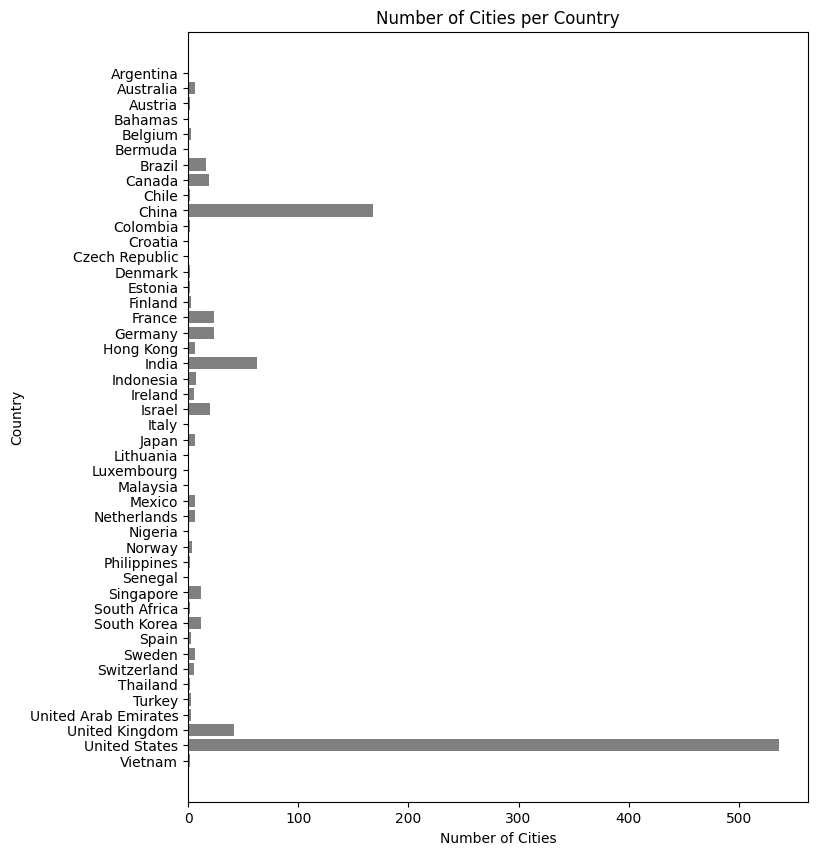

In [10]:
# Plot the countries and cities data
import matplotlib.pyplot as plt

# country_city_dict is the dictionary
countries = list(country_city_dict.keys())
num_cities = [len(cities) for cities in country_city_dict.values()]

plt.figure(figsize=(8, 10))
plt.barh(countries, num_cities, color='gray')
plt.xlabel('Number of Cities')
plt.ylabel('Country')
plt.title('Number of Cities per Country')
plt.gca().invert_yaxis()  # Invert y-axis to have the country with the most cities at the top
plt.show()


## Insights:
- The plot illustrating the number of cities per country provides insight into the distribution of startup ecosystems. It showcases the geographic diversity of entrepreneurship and innovation hubs, where unicorn companies may emerge and thrive. 
- The distribution of cities and unicorn companies across different countries may correlate with economic factors such as GDP, investment climate, and regulatory environment.
- These cities often attract entrepreneurs, investors, and talent, driving innovation, job creation, and economic growth.

In [12]:
# Number of Industry types in the dataset
unicornData['Industry'].value_counts()

Fintech                                                               205
Internet software & services                                          192
E-commerce & direct-to-consumer                                       107
Artificial intelligence                                                71
Health                                                                 69
Supply chain, logistics, & delivery                                    57
Other                                                                  56
Cybersecurity                                                          49
Data management & analytics                                            41
Mobile & telecommunications                                            37
Hardware                                                               33
Auto & transportation                                                  29
Edtech                                                                 28
Consumer & retail                     

In [13]:
# Number of inverstors in dataset
unicornData['Select Inverstors'].value_counts()

None                                                                17
Sequoia Capital                                                      3
SoftBank Group                                                       2
Sequoia Capital China, Qiming Venture Partners, Tencent Holdings     2
Speedinvest, Valar Ventures, Uniqa Ventures                          2
                                                                    ..
Kibo Ventures, SoftBank Group, Atomico                               1
IMM Investment, NXC                                                  1
V FUND, IDG Capital, Green Pine Capital Partners                     1
Tencent Holdings, Goldman Sachs                                      1
Zeev Ventures, Bond, Fifth Wall Ventures                             1
Name: Select Inverstors, Length: 1006, dtype: int64

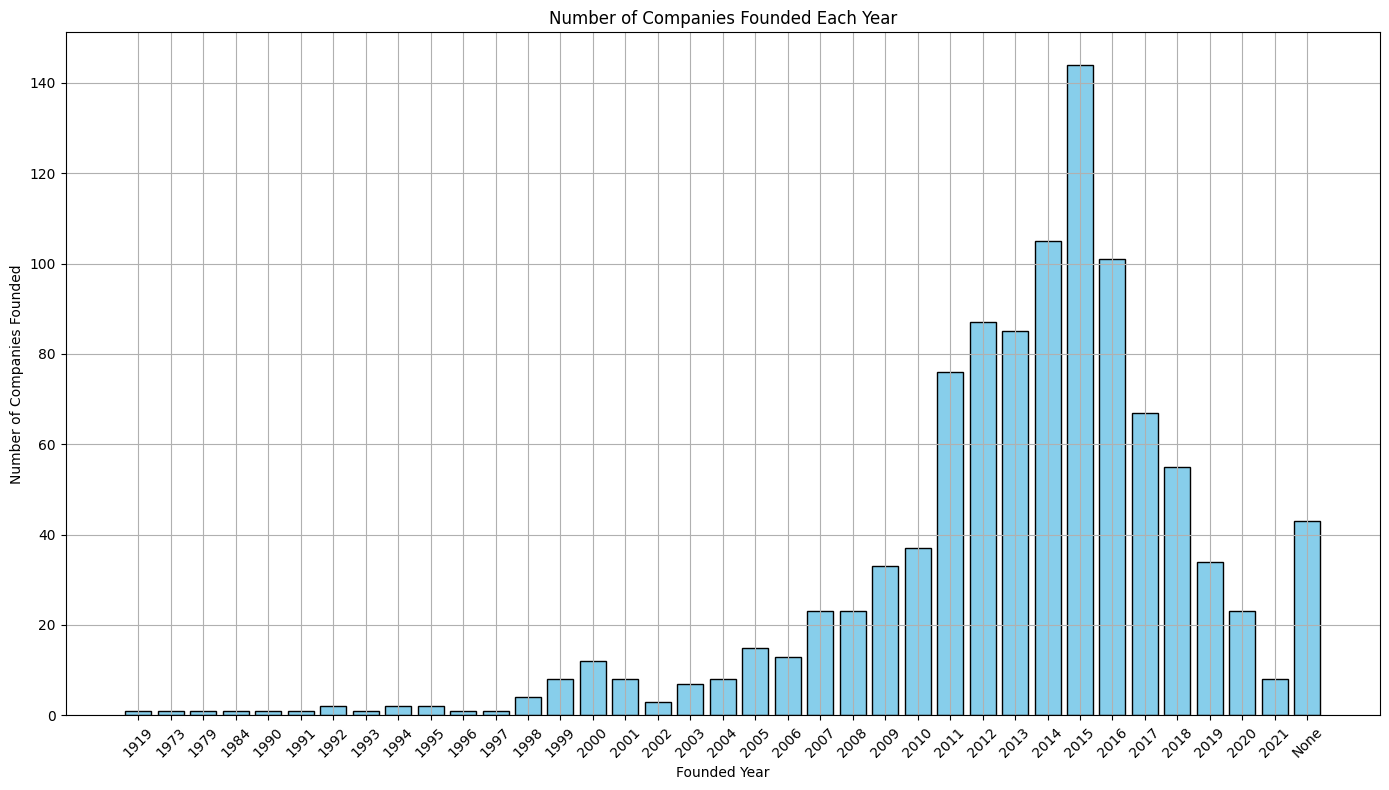

In [14]:
#Plot the companies with their founded years
import matplotlib.pyplot as plt

# Drop rows with missing values in the 'Founded Year' column
df_cleaned = unicornData.dropna(subset=['Founded Year'])

# Group by 'Founded Year' and aggregate the count of companies and the list of companies
grouped = df_cleaned.groupby('Founded Year')['Company'].agg(['count', list])

# Plotting a bar chart
plt.figure(figsize=(14, 8))
bars = plt.bar(grouped.index, grouped['count'], color='skyblue', edgecolor='black')
plt.xlabel('Founded Year')
plt.ylabel('Number of Companies Founded')
plt.title('Number of Companies Founded Each Year')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Insights:
- Policymakers, investors, and ecosystem builders can use the insights gleaned from the chart to formulate policies, allocate resources, and design initiatives aimed at fostering a conducive environment for startup formation and growth.
- Observing trends such as sustained growth, stabilization, or decline in the number of companies founded over multiple years provides a longitudinal perspective on the trajectory of startup ecosystems. 
- Increases or decreases in the number of companies founded during specific years may correspond to significant events, technological advancements, or shifts in market dynamics.

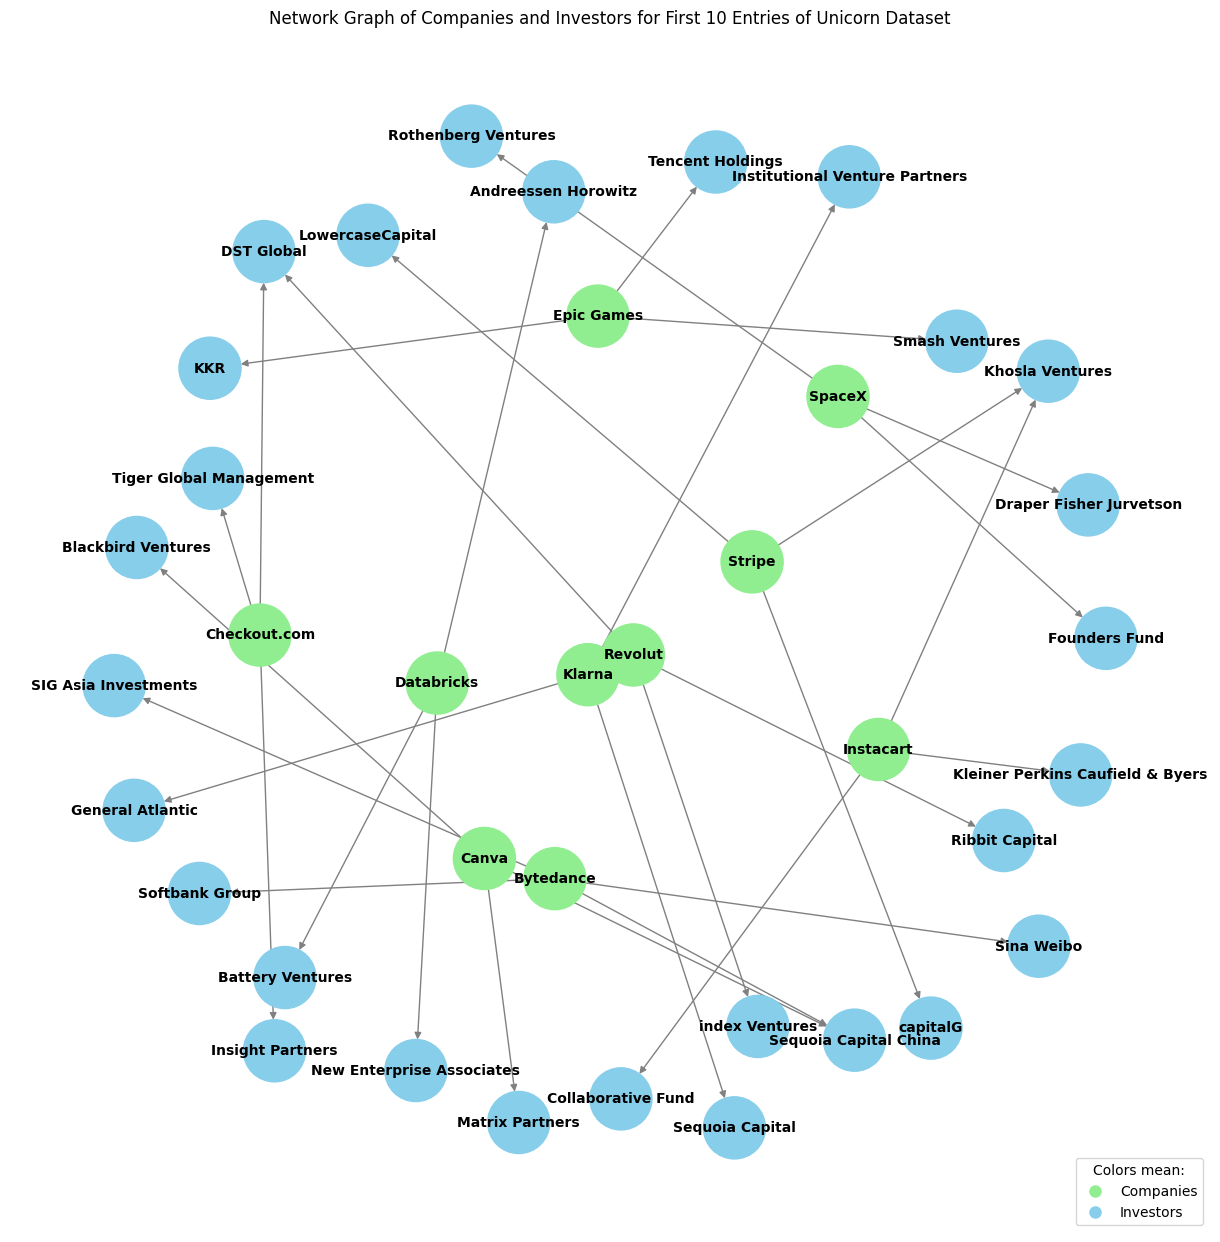

In [29]:
import networkx as nx

subset_data = unicornData.head(10)
# Create a directed graph
G = nx.DiGraph()

# Add companies and investors as nodes
for index, row in subset_data.iterrows():
    company = row['Company']
    investors = row['Select Inverstors'].split(',')
    G.add_node(company, node_type='company')
    for investor in investors:
        G.add_node(investor.strip(), node_type='investor')
        G.add_edge(company,investor.strip())
        
# Assign different colors to nodes based on their type
node_colors = {'company': 'lightgreen', 'investor': 'skyblue'}
colors = [node_colors[G.nodes[node]['node_type']] for node in G.nodes]


# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # Layout for the graph
nx.draw(G, pos, with_labels=True, node_size=2000, node_color=colors, font_size=10, font_weight='bold', edge_color='gray', arrowsize=10)
legend_labels = {'Companies': 'lightgreen', 'Investors': 'skyblue'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in legend_labels.items()]
plt.legend(handles=legend_handles, title='Colors mean:', loc='lower right')
plt.title('Network Graph of Companies and Investors for First 10 Entries of Unicorn Dataset')
plt.show()

## Insights:
- The network graph provides a visual representation of the investment landscape within the subset of companies analyzed. It offers insights into the distribution of capital, the interconnectedness of stakeholders, and the dynamics of investment flows in the startup ecosystem.
- The edges connecting investors to companies highlight the direct investment links between them. Investors provide capital to companies in exchange for equity or other forms of ownership, facilitating the growth and expansion of startups.
- Network graph offers a comprehensive view of the relationships between companies and investors, enabling stakeholders to identify key players, understand investment patterns, and explore opportunities for collaboration and growth within the startup ecosystem.

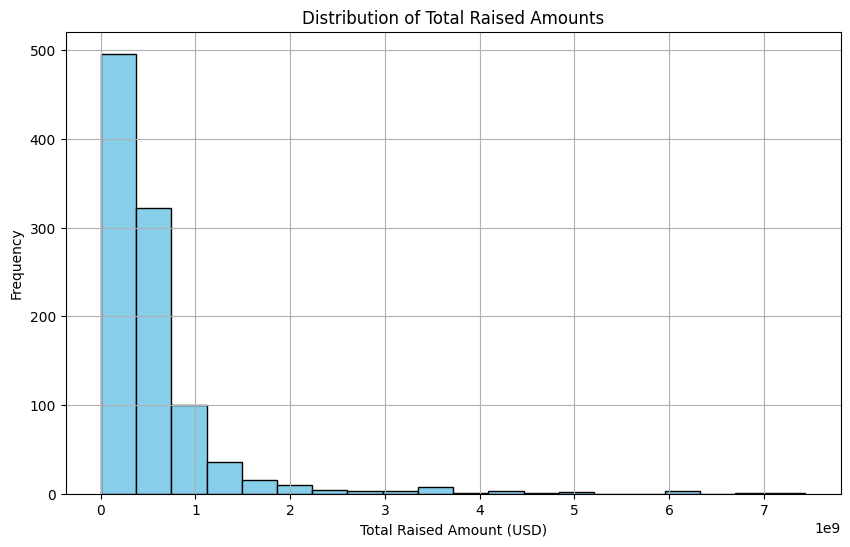

In [30]:
# Plot the Total Raised data
# First we clean and remove unnecessary data from this column
unicornData['Total Raised'] = pd.to_numeric(unicornData['Total Raised'].str.replace(r'[\$,]', '', regex=True).str.replace(r'[Bb]', 'e9', regex=True).str.replace(r'[Mm]', 'e6', regex=True), errors='coerce')


# Histogram of total raised amounts
plt.figure(figsize=(10, 6))
plt.hist(unicornData['Total Raised'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Total Raised Amount (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Raised Amounts')
plt.grid(True)
plt.show()

## Insights:
- The histogram shows a right-skewed distribution, indicating that a majority of unicorn companies have raised relatively smaller amounts of capital, while fewer companies have secured significantly higher funding.
- Analyzing the distribution of total raised amounts can provide insights into investment trends within the startup ecosystem.
- The presence of outliers on the right side of the histogram indicates a few unicorn companies that have raised exceptionally large amounts of capital. These outliers represent high-profile startups that have attracted substantial investments, potentially due to their innovative business models, strong growth potential, or market dominance.

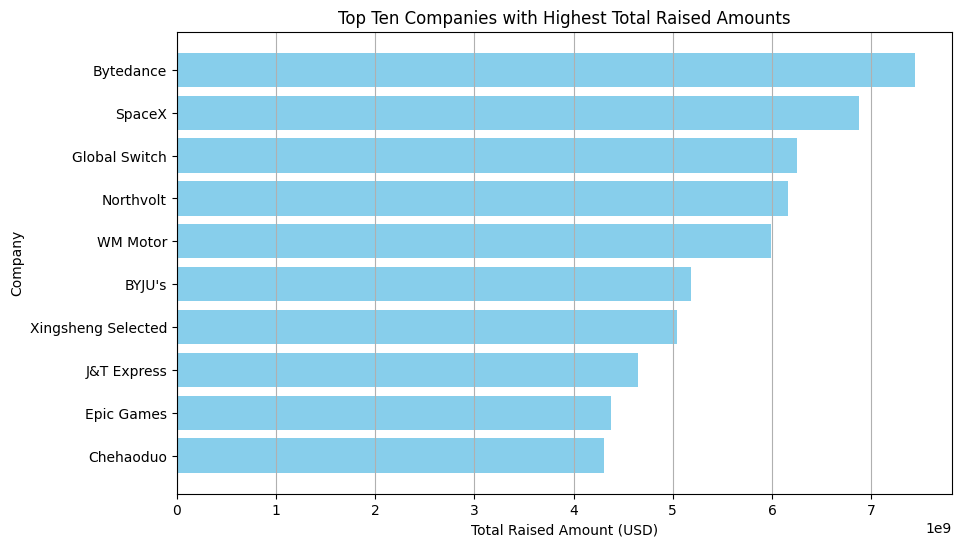

In [31]:
# Find the ten companies with the highest total raised amounts
top_ten_companies = unicornData.nlargest(10, 'Total Raised')[['Company', 'Total Raised']]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_ten_companies['Company'], top_ten_companies['Total Raised'], color='skyblue')
plt.xlabel('Total Raised Amount (USD)')
plt.ylabel('Company')
plt.title('Top Ten Companies with Highest Total Raised Amounts')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest raised company at the top
plt.grid(axis='x')  # Add gridlines along the x-axis
plt.show()


## Insights:
- Companies with large funding rounds may be better positioned to disrupt industries, innovate, and capture market share.
- Companies with higher total raised amounts may have a strategic advantage over their competitors, as they possess greater financial resources to fuel their growth initiatives, expand market presence, and invest in research and development.

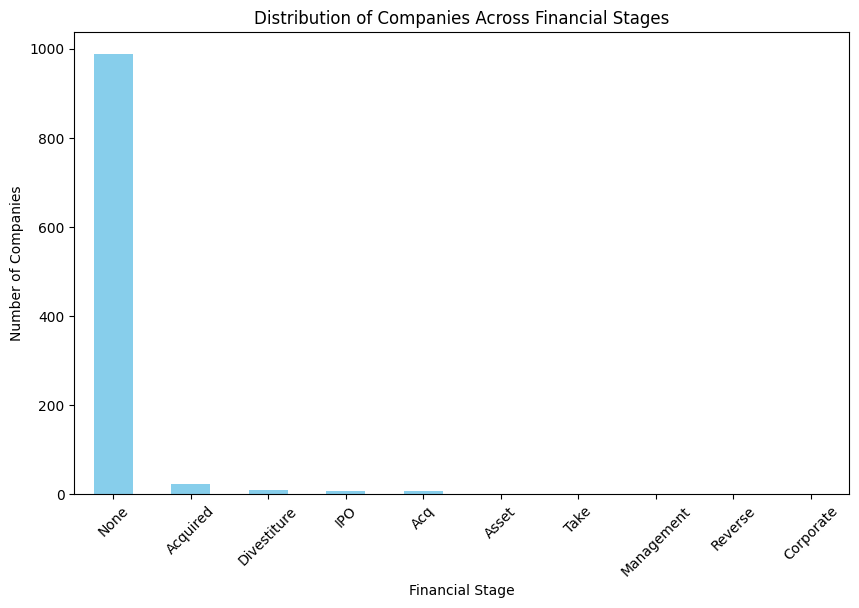

In [21]:
import matplotlib.pyplot as plt

# Replace 'None' values with 'Unknown status'
unicornData['Financial Stage'] = unicornData['Financial Stage'].fillna('Unknown status')

# Count the number of companies in each financial stage
stage_counts = unicornData['Financial Stage'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
stage_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Financial Stage')
plt.ylabel('Number of Companies')
plt.title('Distribution of Companies Across Financial Stages')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


## Insights:
- By examining the height of each bar, we can identify which financial stages are more prevalent among the unicorn companies.
- Companies in different financial stages represent varying degrees of growth and development. For example, companies in the IPO stage are likely preparing for their initial public offering, while companies in the Asset stage may have substantial assets under management.


The column "Financial Stage" in the unicornData DataFrame appears to describe the financial status or stage of various companies. Here's a brief interpretation of the different values:

- IPO: This likely indicates that the company has gone public and is now listed on a stock exchange. IPO stands for Initial Public Offering.
- None: This value may indicate missing or unspecified data for the financial stage of the company. It's possible that information about the financial stage is not available for these entries.
- Asset: This could mean that the company is in a stage where it is focusing on building its assets or has a significant asset base.
- Acquired: This suggests that the company has been acquired by another company or entity. It indicates that the company is no longer independent and has been merged with or taken over by another organization.

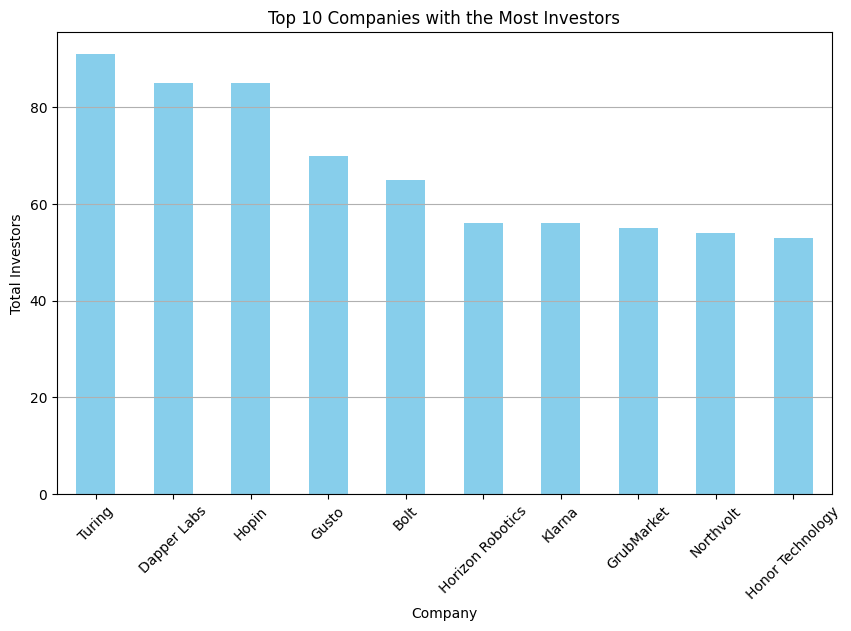

In [32]:
# Convert 'Investors Count' column to numeric
unicornData['Investors Count'] = pd.to_numeric(unicornData['Investors Count'], errors='coerce')

# Group by company name and sum the number of investors for each company
investors_per_company = unicornData.groupby('Company')['Investors Count'].sum()

# Sort the companies by the total number of investors and select the top 10
top_10_companies = investors_per_company.nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_companies.plot(kind='bar', color='skyblue')
plt.xlabel('Company')
plt.ylabel('Total Investors')
plt.title('Top 10 Companies with the Most Investors')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.show()


## Insights:
- Companies with a large number of investors may have established strategic partnerships or collaborations with multiple stakeholders.
- The visualization highlights the attractiveness of certain companies to investors, as reflected by the total number of investors associated with each company. 
- The top 10 companies identified in the visualization may represent market leaders or disruptors within their respective industries. Investors may view these companies as having a competitive edge or significant market opportunity, leading to increased investment interest.

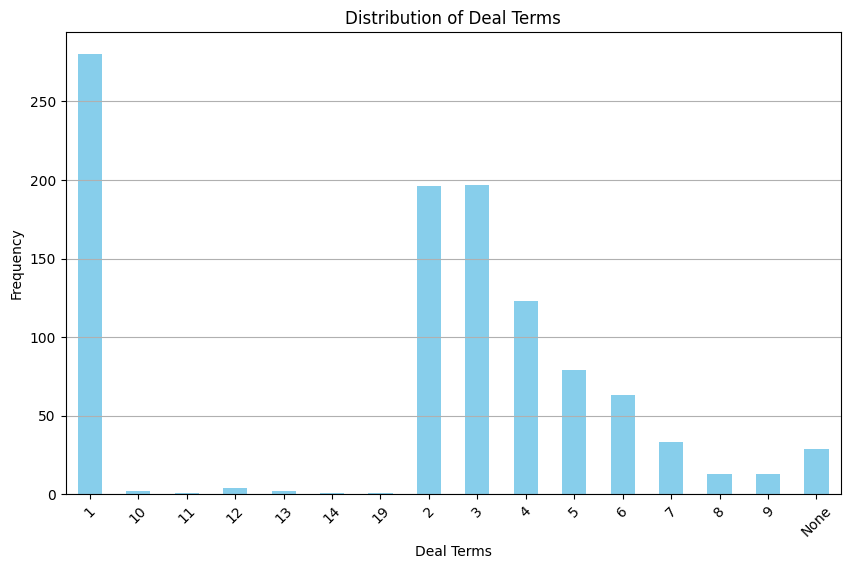

In [33]:
# Plotting
plt.figure(figsize=(10, 6))
unicornData['Deal Terms'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Deal Terms')
plt.ylabel('Frequency')
plt.title('Distribution of Deal Terms')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.show()


## Insights:
- The bar plot illustrates the variety of deal terms present in the dataset, indicating the different types of agreements or arrangements made between companies and investors.
- The tallest bars in the plot represent the most frequently occurring deal terms. These terms are likely to be standard or commonly used in investment agreements within the dataset. 
- Analyzing the distribution of deal terms offers valuable insights into the dynamics of investment transactions, investor behavior, and the broader startup ecosystem.

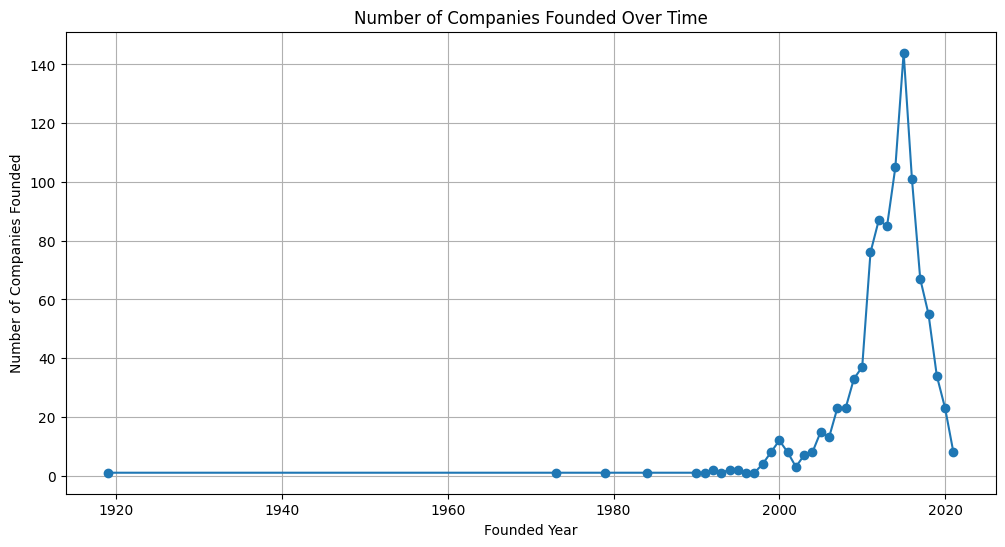

In [34]:
# Convert 'Founded Year' column to datetime
unicornData['Founded Year'] = pd.to_datetime(unicornData['Founded Year'], format='%Y', errors='coerce')

# Drop rows with missing values in 'Founded Year'
unicornData.dropna(subset=['Founded Year'], inplace=True)

# Group by 'Founded Year' and count the number of companies founded each year
founded_year_counts = unicornData['Founded Year'].dt.year.value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
founded_year_counts.plot(marker='o', linestyle='-')
plt.title('Number of Companies Founded Over Time')
plt.xlabel('Founded Year')
plt.ylabel('Number of Companies Founded')
plt.grid(True)
plt.show()


## Insights:
- Peaks or valleys in the plot may indicate significant inflection points or periods of accelerated growth or decline in company formation. These inflection points could be influenced by various factors such as economic conditions, technological advancements, regulatory changes, or shifts in consumer behavior.
- Analyzing the historical trends of company founding can provide valuable context for understanding the evolution of industries, emerging market segments, and disruptive innovations.
- Observing the long-term trendline provides insights into the sustainability and resilience of the startup ecosystem. 

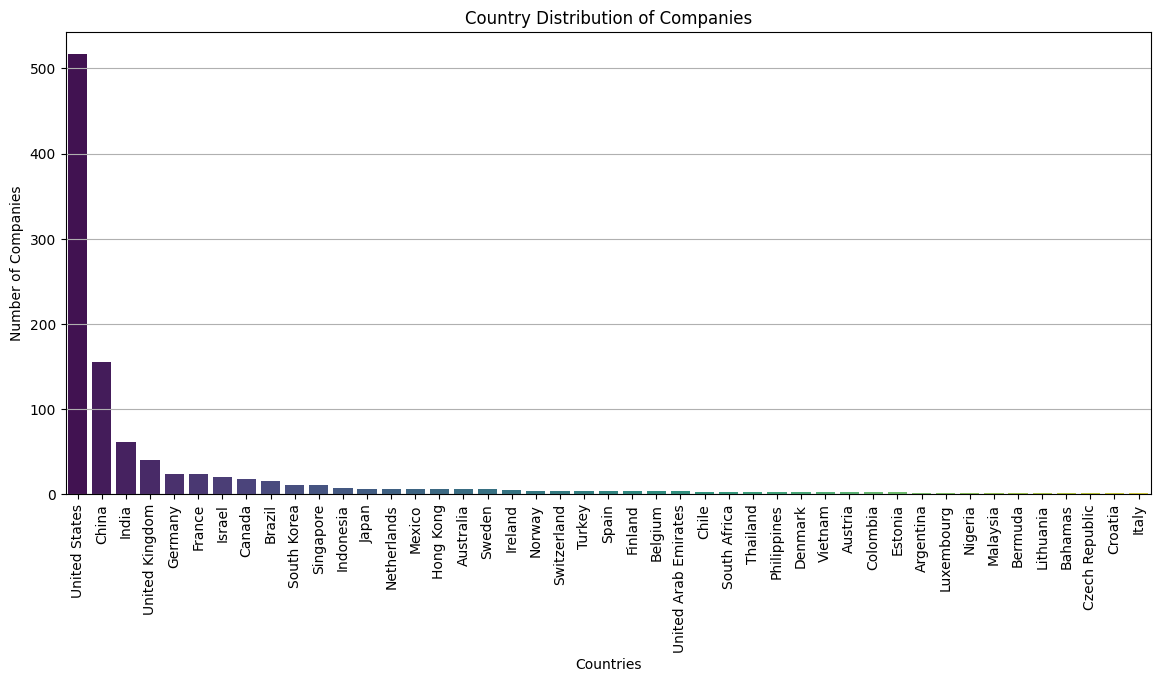

In [35]:
import seaborn as sns

# Plotting
plt.figure(figsize=(14, 6))
sns.countplot(data=unicornData, x='Country', order=unicornData['Country'].value_counts().index, palette='viridis')
plt.title('Country Distribution of Companies')
plt.xlabel('Countries')
plt.ylabel('Number of Companies')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.show()

## Insights:
- The plot illustrates the distribution of unicorn companies across various countries, indicating the concentration of entrepreneurial activity in specific geographic regions.
- The plot may reveal the emergence of new startup ecosystems and innovation hubs in previously underrepresented regions.
- The visualization highlights the global reach of unicorn companies, showcasing their presence in diverse countries and regions around the world. This global dispersion underscores the interconnectedness of the startup landscape and the opportunities for cross-border collaboration, investment, and market expansion.

# Multivariate Analysis:

## Correlation Analysis

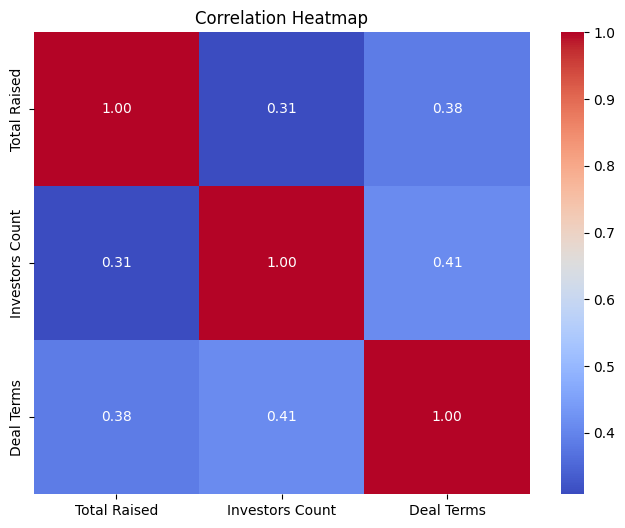

In [39]:
# Convert 'Deal Terms' column to integers
unicornData['Deal Terms'] = pd.to_numeric(unicornData['Deal Terms'], errors='coerce')

# Drop rows with NaN values in 'Deal Terms' and 'Total Raised' columns
unicornData.dropna(subset=['Deal Terms', 'Total Raised'], inplace=True)

# Compute correlation matrix
correlation_matrix = unicornData[['Total Raised', 'Investors Count', 'Deal Terms']].corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## Insights:
- The correlation coefficient between "Total Raised" and "Investors Count" indicates a weak positive correlation. This suggests that there is a slight tendency for companies with more investors to have higher total raised amounts, although the relationship is not very strong.
- The correlation coefficient between "Total Raised" and "Deal Terms" suggests a weak positive correlation. This implies that there may be a slight tendency for companies with higher total raised amounts to have higher deal terms.
- The correlation coefficient between "Investors Count" and "Deal Terms" is moderate positive, indicating almost no linear relationship between the number of investors and deal terms.

## Regression Analysis

In [40]:
import pandas as pd
import statsmodels.api as sm

# Convert 'Deal Terms' to numeric
unicornData['Deal Terms'] = pd.to_numeric(unicornData['Deal Terms'], errors='coerce')

# Drop rows with missing values
unicornData.dropna(subset=['Total Raised', 'Investors Count', 'Deal Terms'], inplace=True)

# Define predictor variables (X) and target variable (y)
X = unicornData[['Investors Count', 'Deal Terms']]
y = unicornData['Total Raised']

# Add constant to predictor variables
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X).fit()

# Print summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Total Raised   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     101.5
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           1.00e-40
Time:                        17:27:21   Log-Likelihood:                -20931.
No. Observations:                 962   AIC:                         4.187e+04
Df Residuals:                     959   BIC:                         4.188e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.404e+07   4.49e+07     

## Insights:
- Both predictor variables ("Investors Count" and "Deal Terms") are statistically significant, as evidenced by their low p-values (p < 0.05). This suggests that they have a significant linear relationship with the "Total Raised" amount.
- The regression model indicates that both "Investors Count" and "Deal Terms" are important predictors of the "Total Raised" amount for unicorn companies. However, the model's low R-squared value suggests that there may be other factors not included in the model that also influence the "Total Raised" amount.

## Cluster Analysis

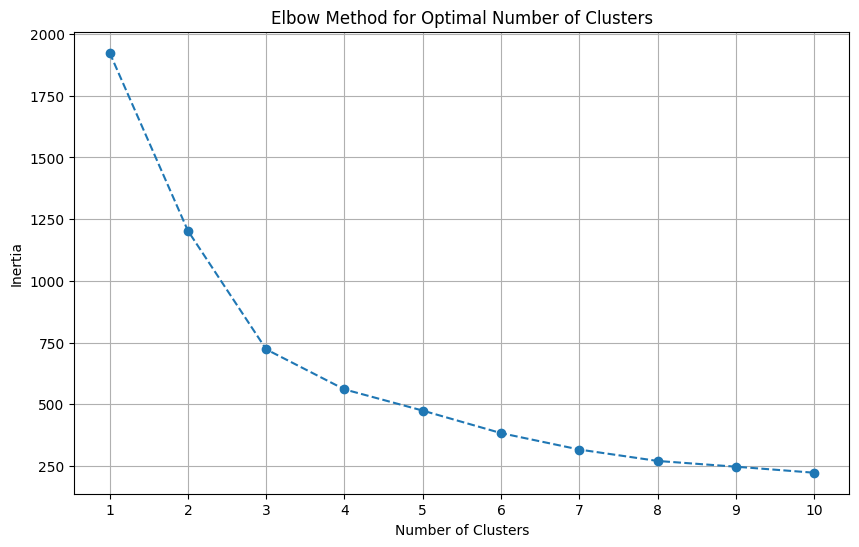

In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = ['Total Raised', 'Investors Count']

# Drop rows with missing values in selected features
data_for_clustering = unicornData[features].dropna()

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Determine the optimal number of clusters using the elbow method
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()



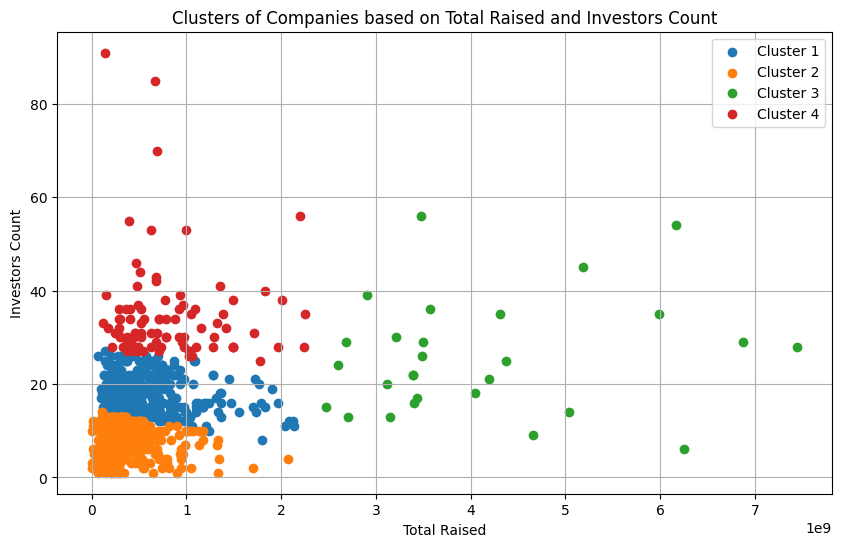

In [42]:
# Based on the elbow method, choose the optimal number of clusters
optimal_k = 4  # Adjust this based on the elbow curve

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataset
data_for_clustering['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = data_for_clustering[data_for_clustering['Cluster'] == cluster]
    plt.scatter(cluster_data['Total Raised'], cluster_data['Investors Count'], label=f'Cluster {cluster + 1}')

plt.xlabel('Total Raised')
plt.ylabel('Investors Count')
plt.title('Clusters of Companies based on Total Raised and Investors Count')
plt.legend()
plt.grid(True)
plt.show()

## Insights:
- Once companies are clustered into groups, it becomes easier to identify opportunities or areas of focus within each cluster. This can inform targeted marketing strategies, investment opportunities, or other business decisions.
- By clustering companies based on their features, the analysis can reveal groups of companies that share similar traits. This can help in identifying patterns or commonalities among companies, which can be useful for market analysis.